In [ ]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

In [ ]:
indicator_data.reset_index()
indicator_data.head()

In [ ]:
India_df_ind7 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.GROW'])) & \
                               (indicator_data['CountryCode'] == 'IN')]

In [5]:
India_df_ind7.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [ ]:
ts = India_df_ind7['Value'] 
ts1 = India_df_ind7[['Value']].copy() 
ts1.head()

In [ ]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


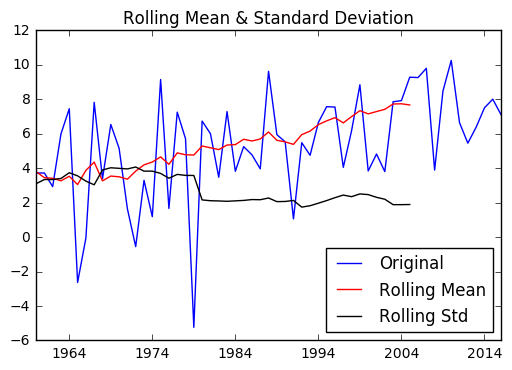

Results of Dickey-Fuller Test:
Test Statistic                 -1.121589
p-value                         0.706386
#Lags Used                     10.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

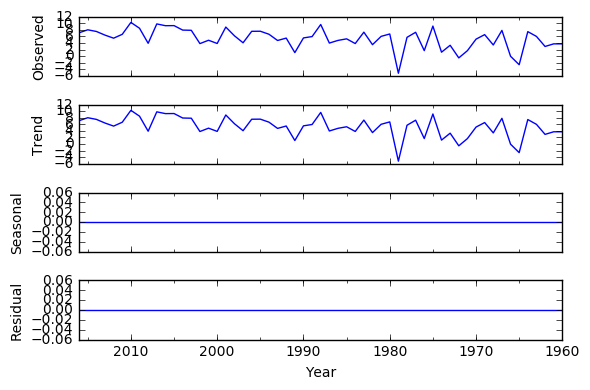

In [9]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

## Taking Log

In [10]:
def logTransform(df):
    df=df+20
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

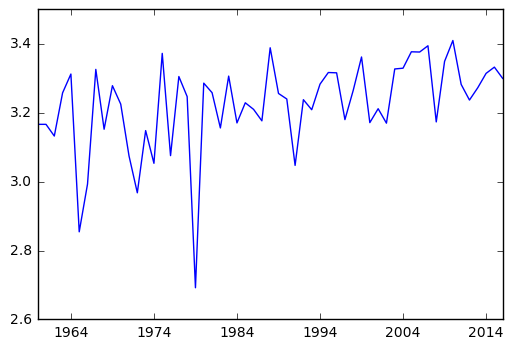

In [11]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


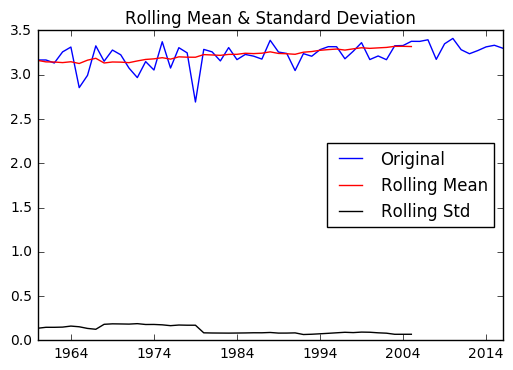

Results of Dickey-Fuller Test:
Test Statistic                 -0.915321
p-value                         0.782885
#Lags Used                      7.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [12]:
test_stationarity(ts1_log.Value)

## Log first difference 

In [27]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


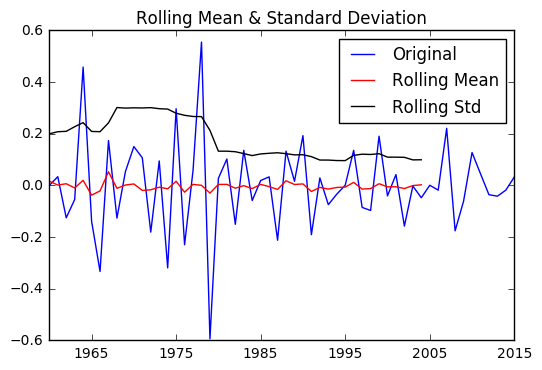

Results of Dickey-Fuller Test:
Test Statistic                -6.330380e+00
p-value                        2.916233e-08
#Lags Used                     6.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (1%)           -3.571472e+00
Critical Value (5%)           -2.922629e+00
Critical Value (10%)          -2.599336e+00
dtype: float64


In [28]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

## First difference 

In [89]:
def firstDifference(df):
    #ts_first_diff = df - df.shift()
    #ts_first_diff.dropna(inplace=True)
    ts_first_diff = df.diff()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff



C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


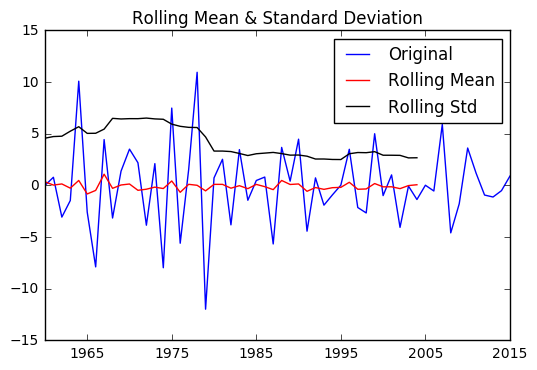

Results of Dickey-Fuller Test:
Test Statistic                 -4.443647
p-value                         0.000248
#Lags Used                      9.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [90]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [31]:
def expWeightedavg(ts1):
    expwighted_avg = pd.ewma(ts1_log, halflife=12)
    ts_log_ewma_diff = ts1_log - expwighted_avg
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,halflife=12,ignore_na=False,min_periods=0).mean()
  from ipykernel import kernelapp as app
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


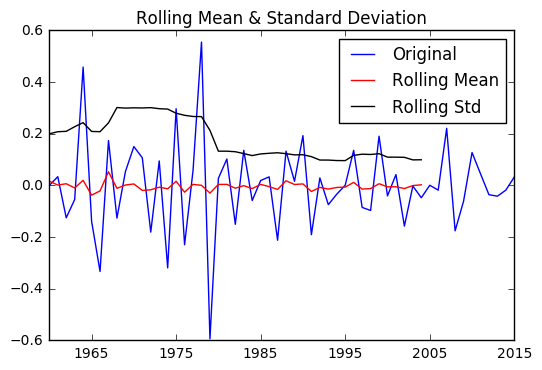

Results of Dickey-Fuller Test:
Test Statistic                -6.330380e+00
p-value                        2.916233e-08
#Lags Used                     6.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (1%)           -3.571472e+00
Critical Value (5%)           -2.922629e+00
Critical Value (10%)          -2.599336e+00
dtype: float64


In [32]:
ts_log_ewma_diff = expWeightedavg(ts1)
test_stationarity(ts_log_ewma_diff.Value)

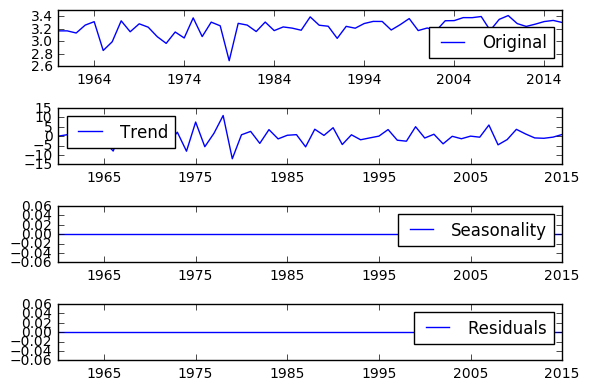

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_first_diff)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [94]:
lag_acf = acf(ts1_first_diff, nlags=10)
lag_pacf = pacf(ts1_first_diff, nlags=10, method='ols')

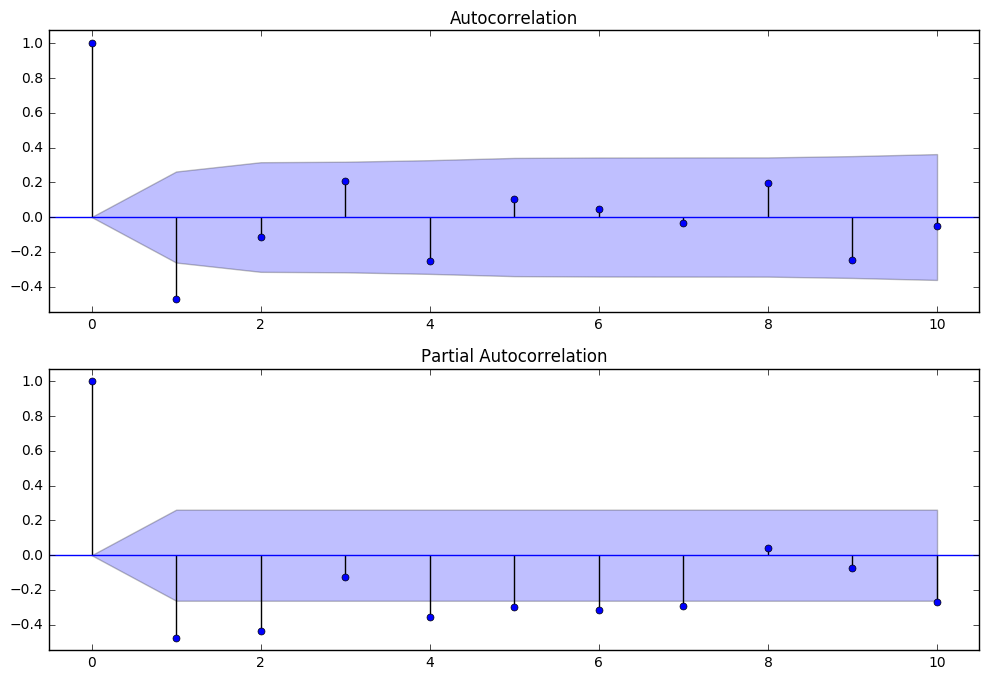

In [95]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_first_diff, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_first_diff, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

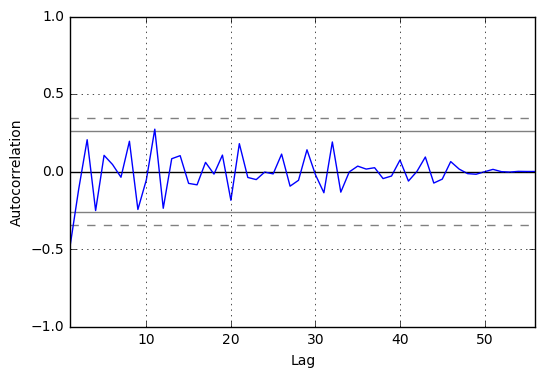

In [96]:
autocorrelation_plot(ts1_first_diff)
plt.show()

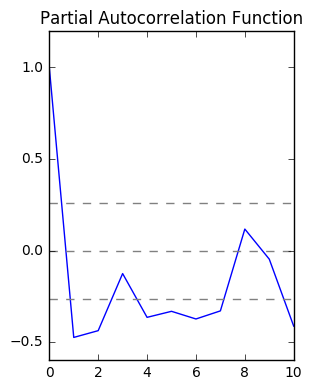

In [97]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [98]:
sm.tsa.arma_order_select_ic(ts1_first_diff, max_ar=4, max_ma=2, ic='aic')

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'aic':             0           1           2
 0  320.880583  281.070237  281.738315
 1  308.841371  282.281832  283.055344
 2  299.363695  282.049449  282.903591
 3  300.527458  283.959352  284.062351
 4  295.262795  279.718395  280.676207, 'aic_min_order': (4, 1)}

In [39]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [40]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [99]:
def AR_Model(ts):
    model = ARIMA(ts, order=(4, 1, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 4
Coefficients: const            0.004951
ar.L1.D.Value   -1.233950
ar.L2.D.Value   -1.143743
ar.L3.D.Value   -0.647217
ar.L4.D.Value   -0.335605
dtype: float64
2005-01-01    0.670391
Freq: -1AS-JAN, dtype: float64
322.3688555472197


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


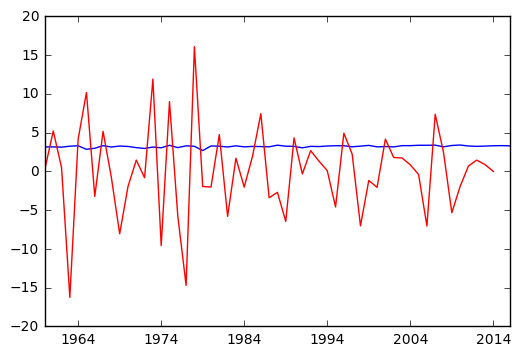

In [100]:
model_AR = AR_Model(ts1_first_diff)

In [108]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,1, 1))
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 5))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const            0.000381
ma.L1.D.Value   -1.000000
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   55
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -158.119
Method:                       css-mle   S.D. of innovations              4.134
Date:                Fri, 18 Aug 2017   AIC                            322.238
Time:                        14:48:33   BIC                            328.260
Sample:                    01-01-2014   HQIC                           324.567
                         - 01-01-1960                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.0004      0.034      0.011      0.991        -0.067     0.067
ma.L1.D.Value    -1.0000      0.04

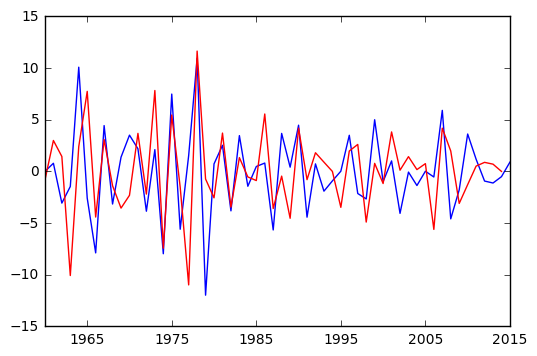

In [109]:
model_MA = MA_Model(ts1_first_diff)

In [114]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(4, 1, 0))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2,0, 5))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 4
Coefficients: const            0.004951
ar.L1.D.Value   -1.233950
ar.L2.D.Value   -1.143743
ar.L3.D.Value   -0.647217
ar.L4.D.Value   -0.335605
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   55
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -155.184
Method:                       css-mle   S.D. of innovations              3.990
Date:                Fri, 18 Aug 2017   AIC                            322.369
Time:                        14:48:57   BIC                            334.413
Sample:                    01-01-2014   HQIC                           327.026
                         - 01-01-1960                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.0050      0.127   

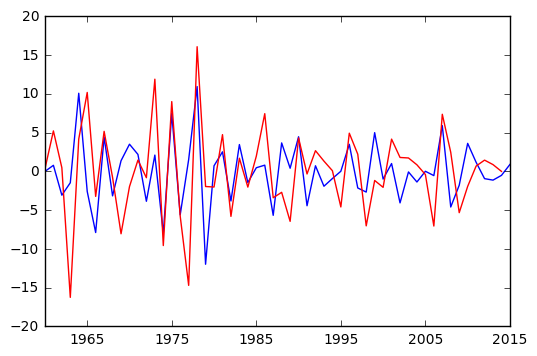

In [115]:
model_Combined = Combined_Model(ts1_first_diff)

In [113]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(2,0, 5))


In [61]:
aic_metric

,AIC,Modelname
0,-61.134060,"ARIMA(ts, order=(2, 0, 0))"
0,-16.052569,"ARIMA(ts, order=(2, 0, 0))"
0,-61.376457,"ARIMA(ts, order=(2, 0, 0))"
0,-59.576224,"ARIMA(ts, order=(2, 0, 0))"
0,-61.134060,"ARIMA(ts, order=(2, 0, 0))"
0,-61.088954,"ARIMA(ts, order=(0, 0, 5))"
0,-59.172950,"ARIMA(ts, order=(2,0, 5))"


In [122]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    #output.tolist()
    output=normal(output)
   
    #output = np.exp(output)
    return output

In [123]:
forecast(model_Combined,60)

normalized


array([ 1.50334221,  0.12223029, -0.17881485,  0.80073539,  0.34870366,
        0.48909087,  0.36611351,  0.40889896,  0.66697469,  0.46302703,
        0.5856477 ,  0.66035382,  0.66903995,  0.77927938,  0.78271909,
        0.88219225,  0.96333503,  1.01388889,  1.11843035,  1.19256313,
        1.29000933,  1.39038083,  1.48362969,  1.59902731,  1.7071126 ,
        1.8241057 ,  1.94811486,  2.07216682,  2.20641926,  2.34209453,
        2.48355414,  2.63122162,  2.78185798,  2.93909854,  3.1004242 ,
        3.26673973,  3.43854407,  3.61459711,  3.79611826,  3.98239463,
        4.17354637,  4.36986755,  4.57091003,  4.77705194,  4.9881086 ,
        5.20406676,  5.42505966,  5.65093067,  5.88179123,  6.11760118,
        6.35833928,  6.60405811,  6.85470567,  7.11031322,  7.37087475,
        7.63637794,  7.90684208,  8.18225086,  8.46261233,  8.74792687])

In [124]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    PredictedVal=normal(fittedVal)
    #PredictedVal= fittedVal.tolist()
    #fittedVal=fittedVal-20
    #fittedVal = np.exp(fittedVal)
    print('Predicted existing values are:')
    
    return PredictedVal
FittedValues(model_Combined)


normalized
Predicted existing values are:


Year
2014-01-01     0.004951
2013-01-01     0.885172
2012-01-01     2.345380
2011-01-01     3.040394
2010-01-01     1.109693
2009-01-01    -4.210751
2008-01-01    -1.744225
2007-01-01     5.633679
2006-01-01    -1.410516
2005-01-01    -1.810411
2004-01-01    -0.955744
2003-01-01     0.783107
2002-01-01     2.585505
2001-01-01     6.756793
2000-01-01     4.705404
1999-01-01     3.541287
1998-01-01    -3.479995
1997-01-01    -1.254561
1996-01-01     3.681941
1995-01-01    -0.899255
1994-01-01    -0.802338
1993-01-01     0.530635
1992-01-01     3.210758
1991-01-01     2.885132
1990-01-01     7.209280
1989-01-01     0.769116
1988-01-01    -1.925998
1987-01-01    -5.319318
1986-01-01     2.136660
1985-01-01     4.105249
1984-01-01     2.084746
1983-01-01     3.791856
1982-01-01    -2.005756
1981-01-01     2.743251
1980-01-01     0.734033
1979-01-01    -1.210147
1978-01-01    14.884735
1977-01-01     0.184622
1976-01-01    -5.577793
1975-01-01     3.433681
1974-01-01    -6.127900
1973-01-01 

In [116]:
def normal(predictions_ARIMA_diff):
    #predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    print('normalized')
    #predictions_ARIMA_diff_cumsum=np.absolute(predictions_ARIMA_diff_cumsum)
    return predictions_ARIMA_diff_cumsum